In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/alzheimers_disease_data (1).csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
df.shape

(2149, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['PatientID','DoctorInCharge'],axis=1,inplace=True)

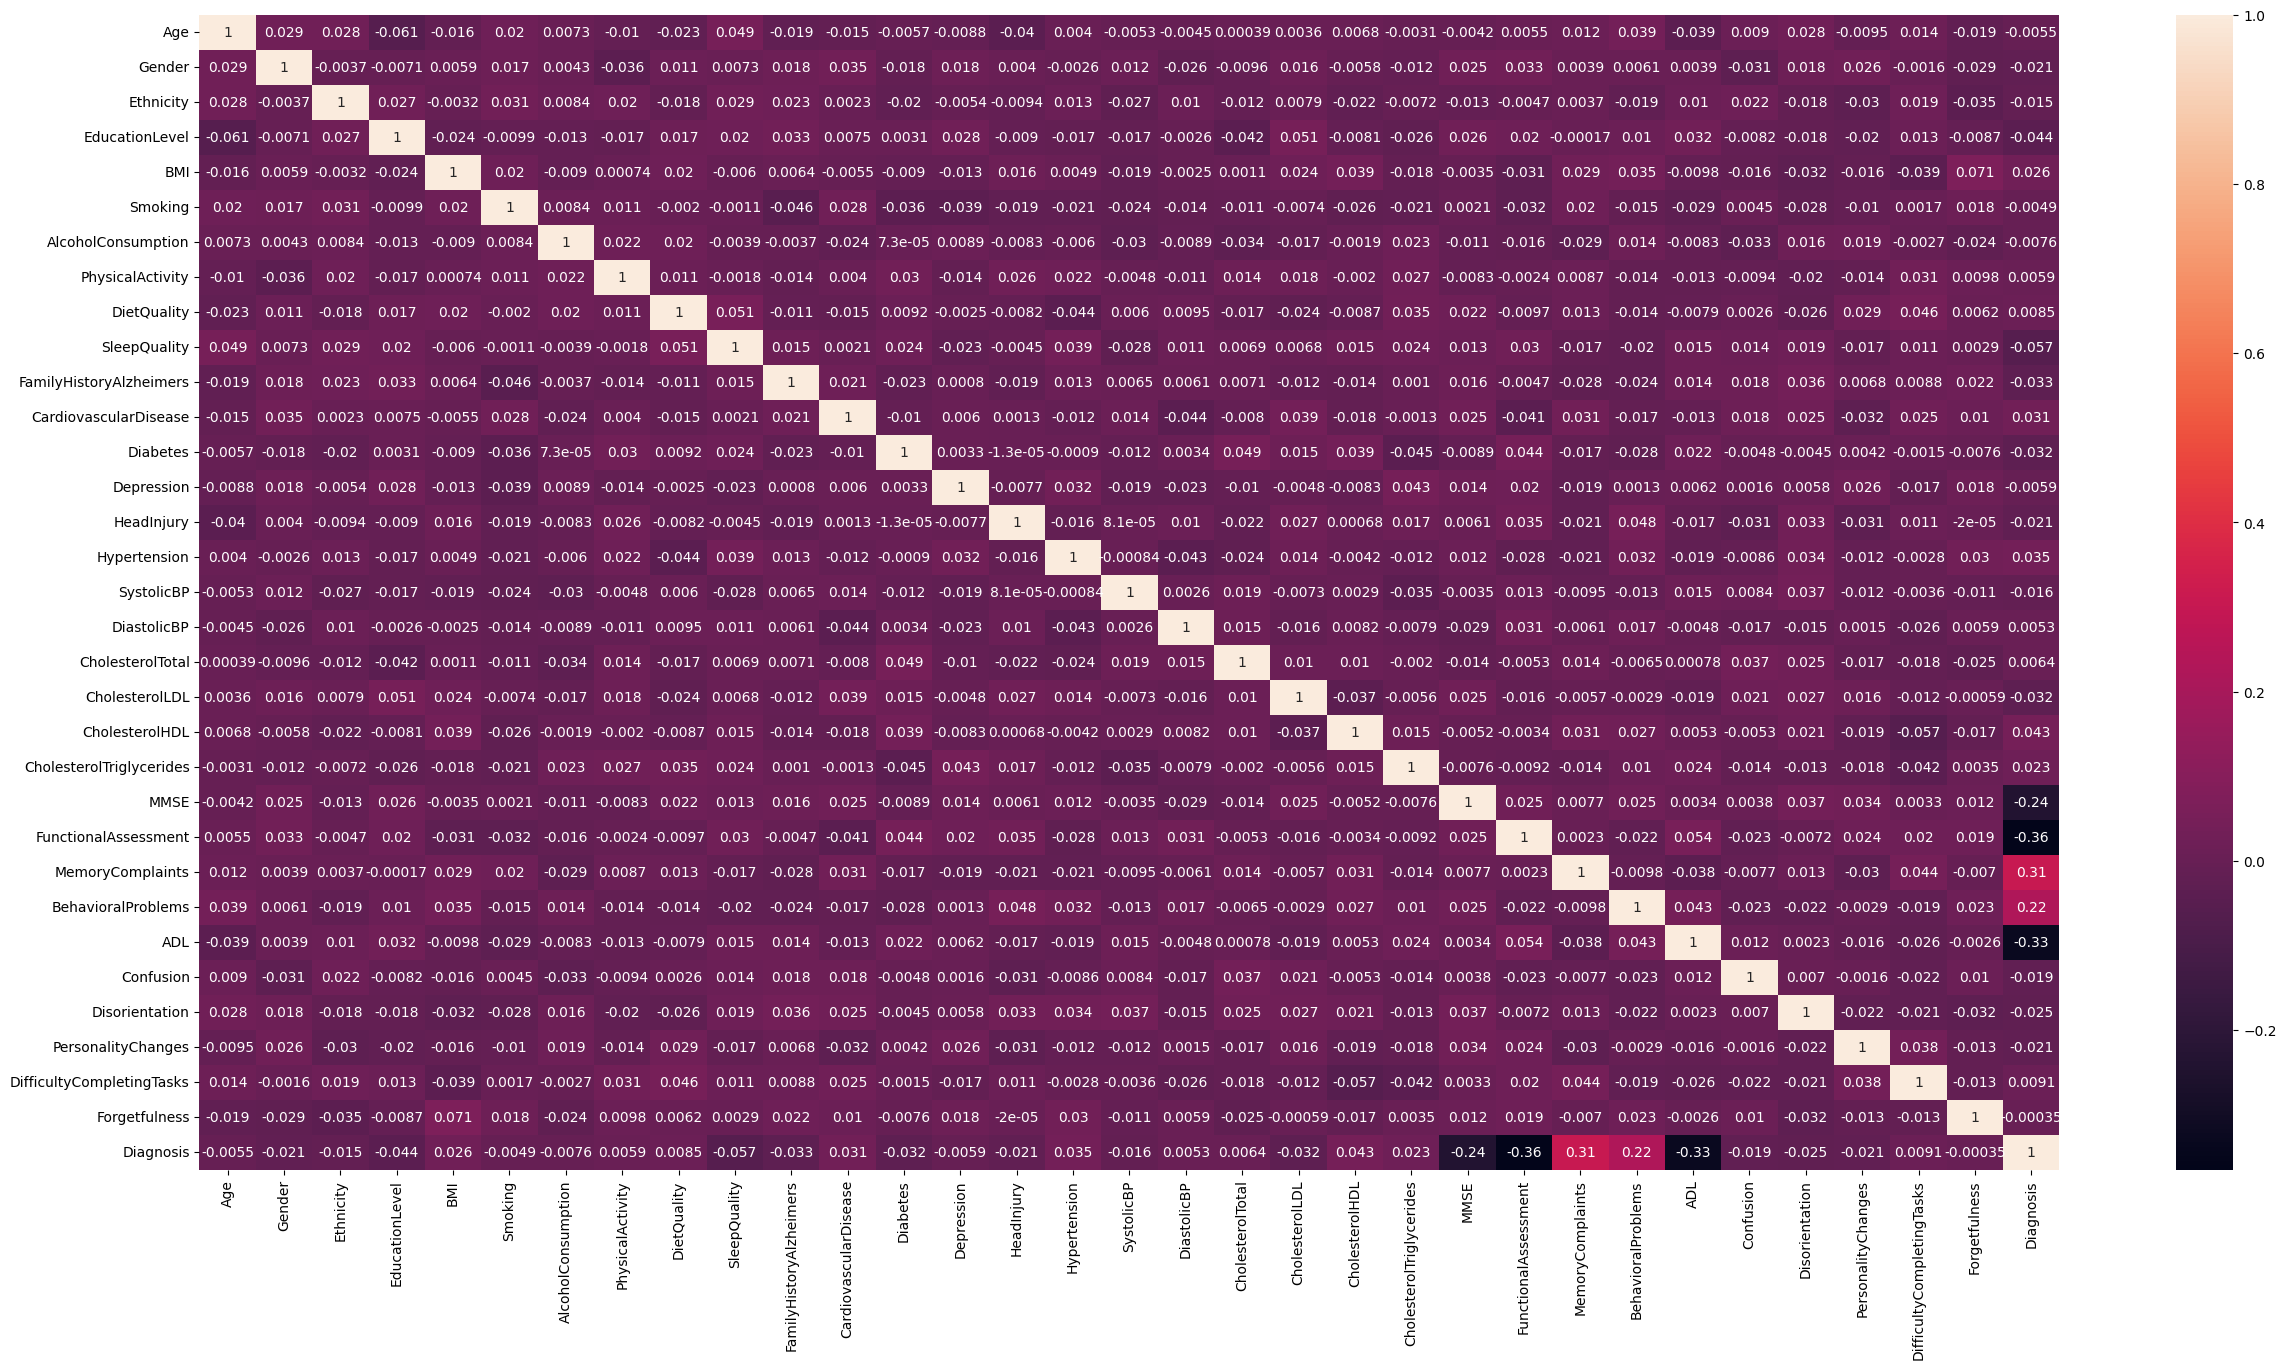

In [9]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)
# plt.savefig("plot0.png")
plt.show()


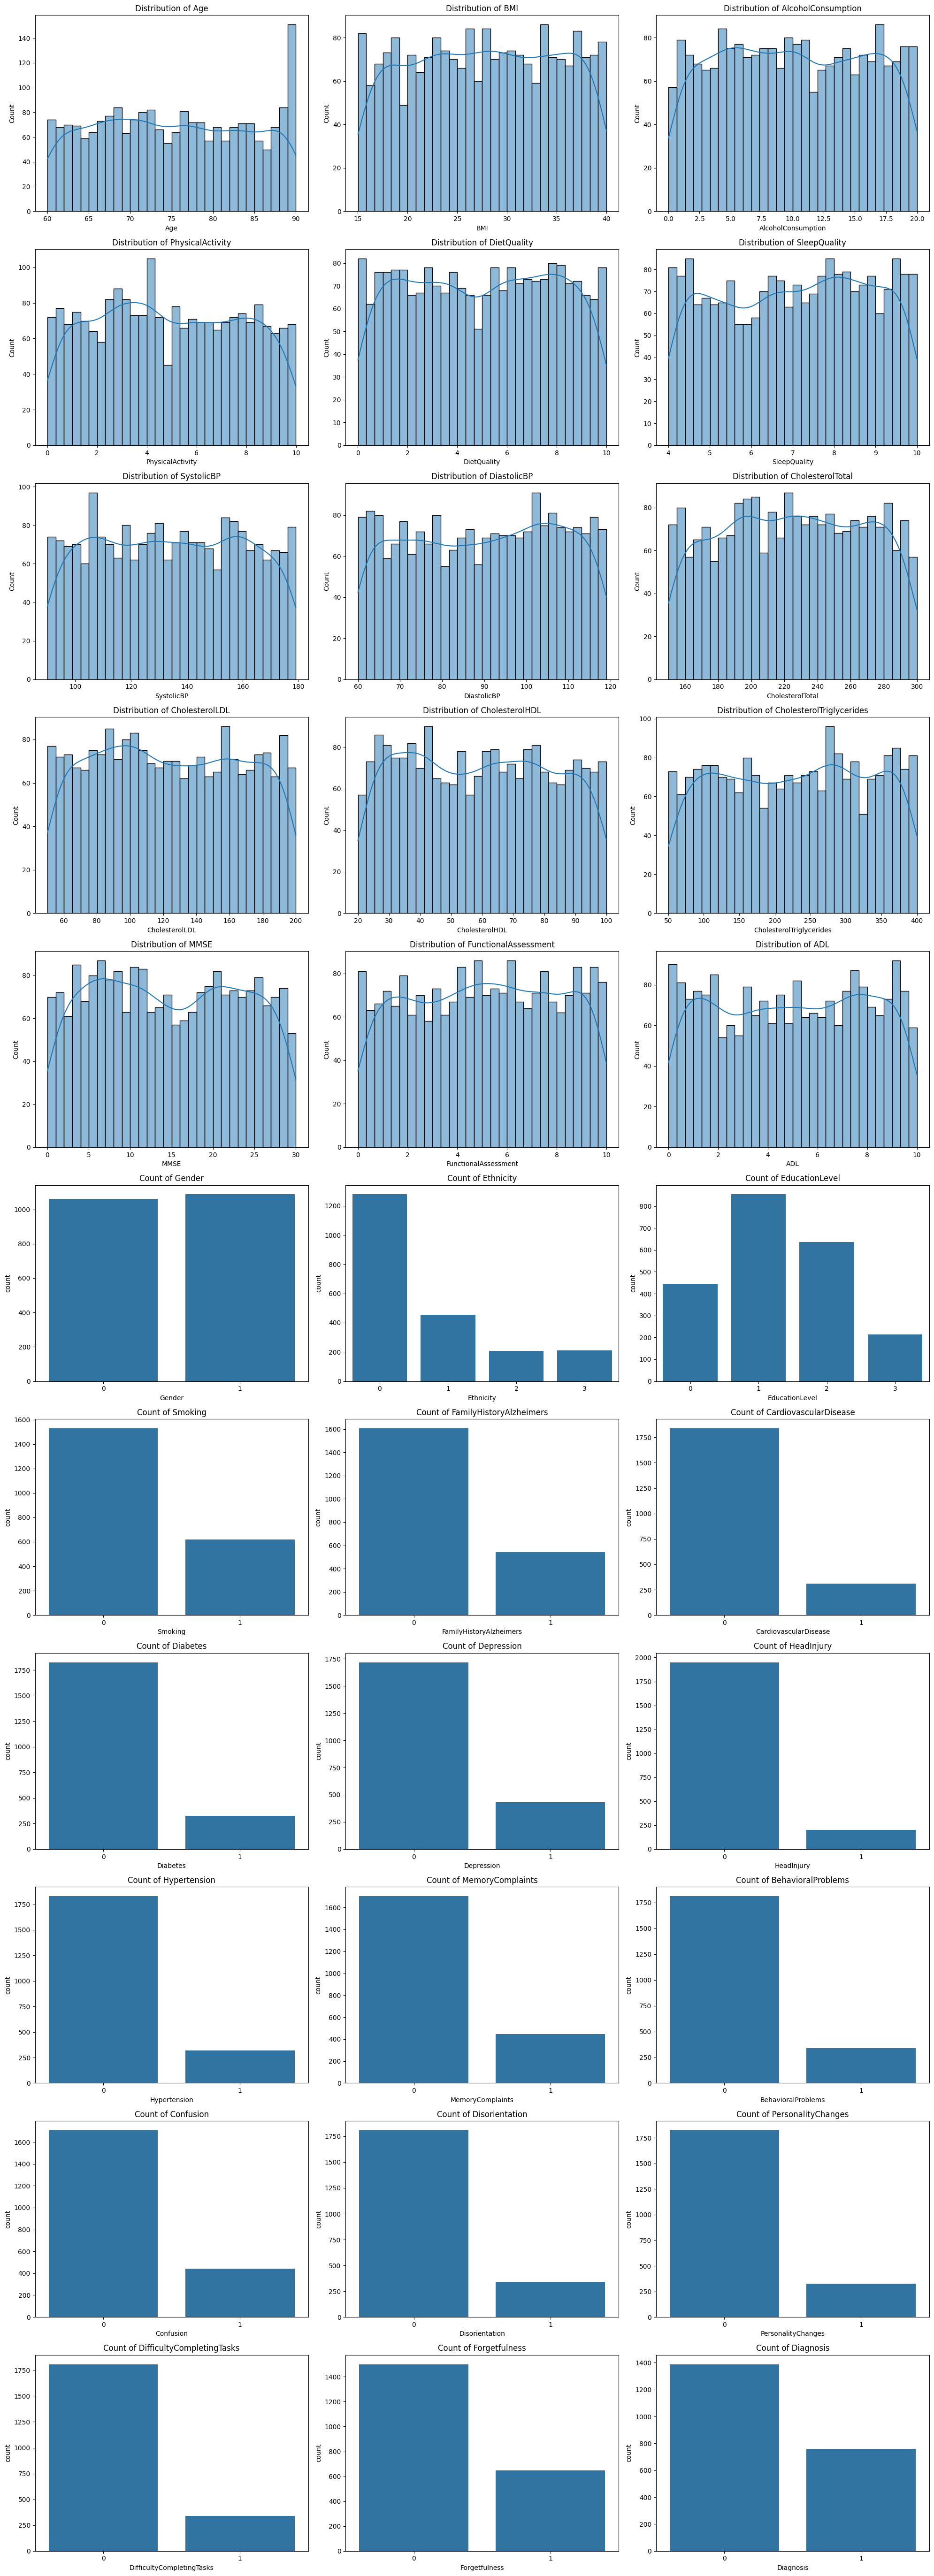

In [10]:
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(20, 55))
fig.subplots_adjust(hspace=0.5)

numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                     'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                     'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

categorical_columns = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
                       'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                       'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
                       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

for idx, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].set_title(f'Distribution of {col}')

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[(len(numerical_columns) + idx) // 3, (len(numerical_columns) + idx) % 3])
    axes[(len(numerical_columns) + idx) // 3, (len(numerical_columns) + idx) % 3].set_title(f'Count of {col}')

plt.tight_layout()
# plt.savefig("plot1.png")
plt.show()


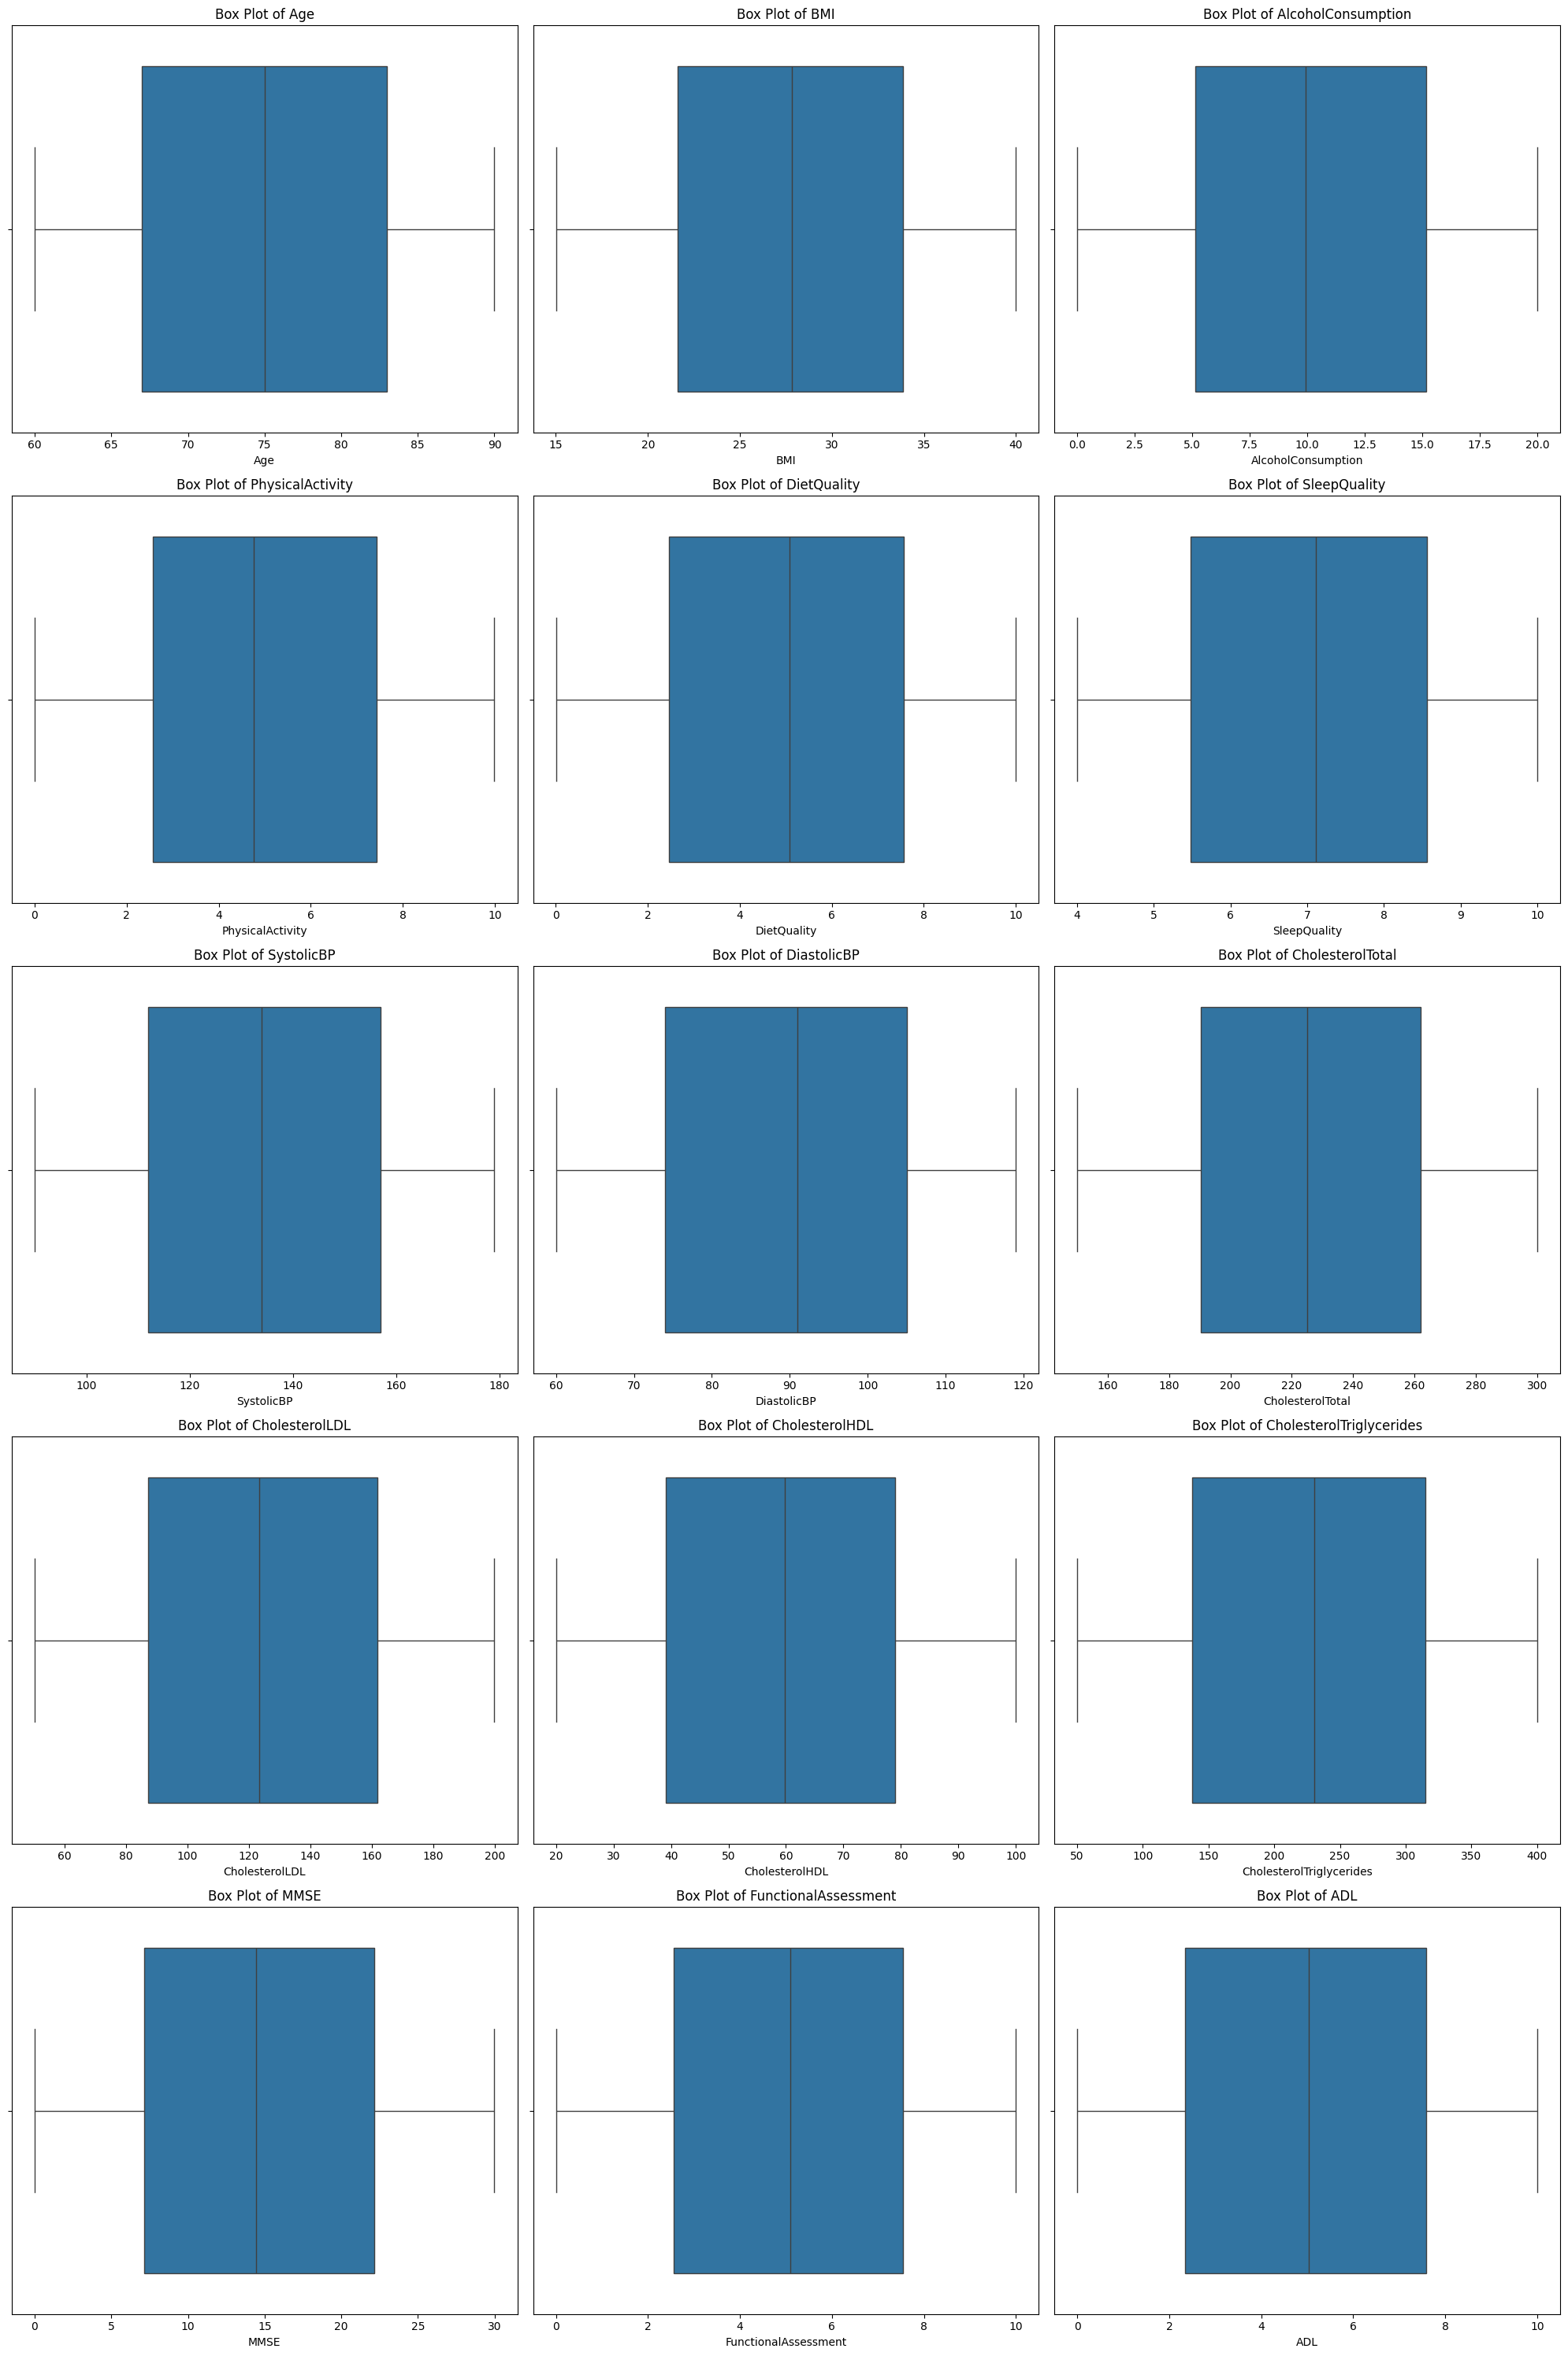

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))
fig.subplots_adjust(hspace=0.5)

for idx, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].set_title(f'Box Plot of {col}')

plt.tight_layout()
# plt.savefig("plot2.png")
plt.show()


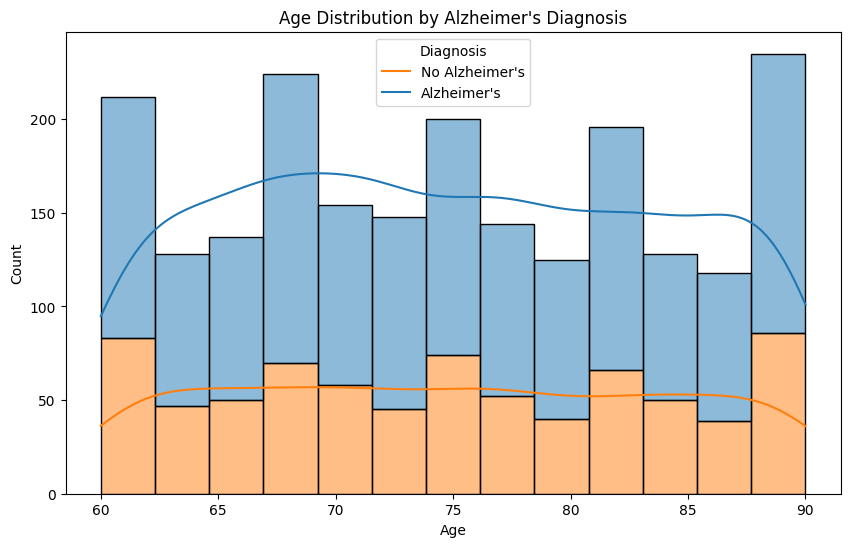

In [12]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Age', hue='Diagnosis', kde=True, multiple="stack")
plt.title('Age Distribution by Alzheimer\'s Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['No Alzheimer\'s', 'Alzheimer\'s'])
# plt.savefig("plot3.png")
plt.show()

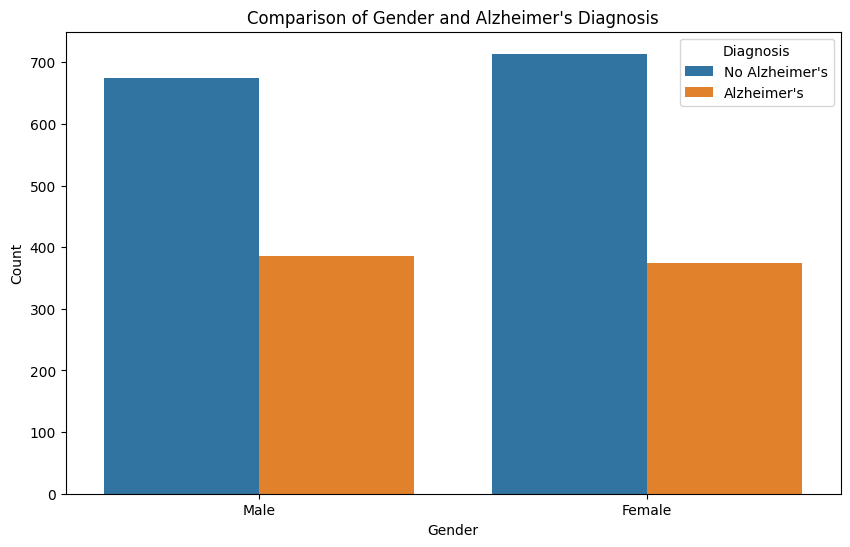

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.title('Comparison of Gender and Alzheimer\'s Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Diagnosis', labels=['No Alzheimer\'s', 'Alzheimer\'s'])
# plt.savefig("plot4.png")
plt.show()


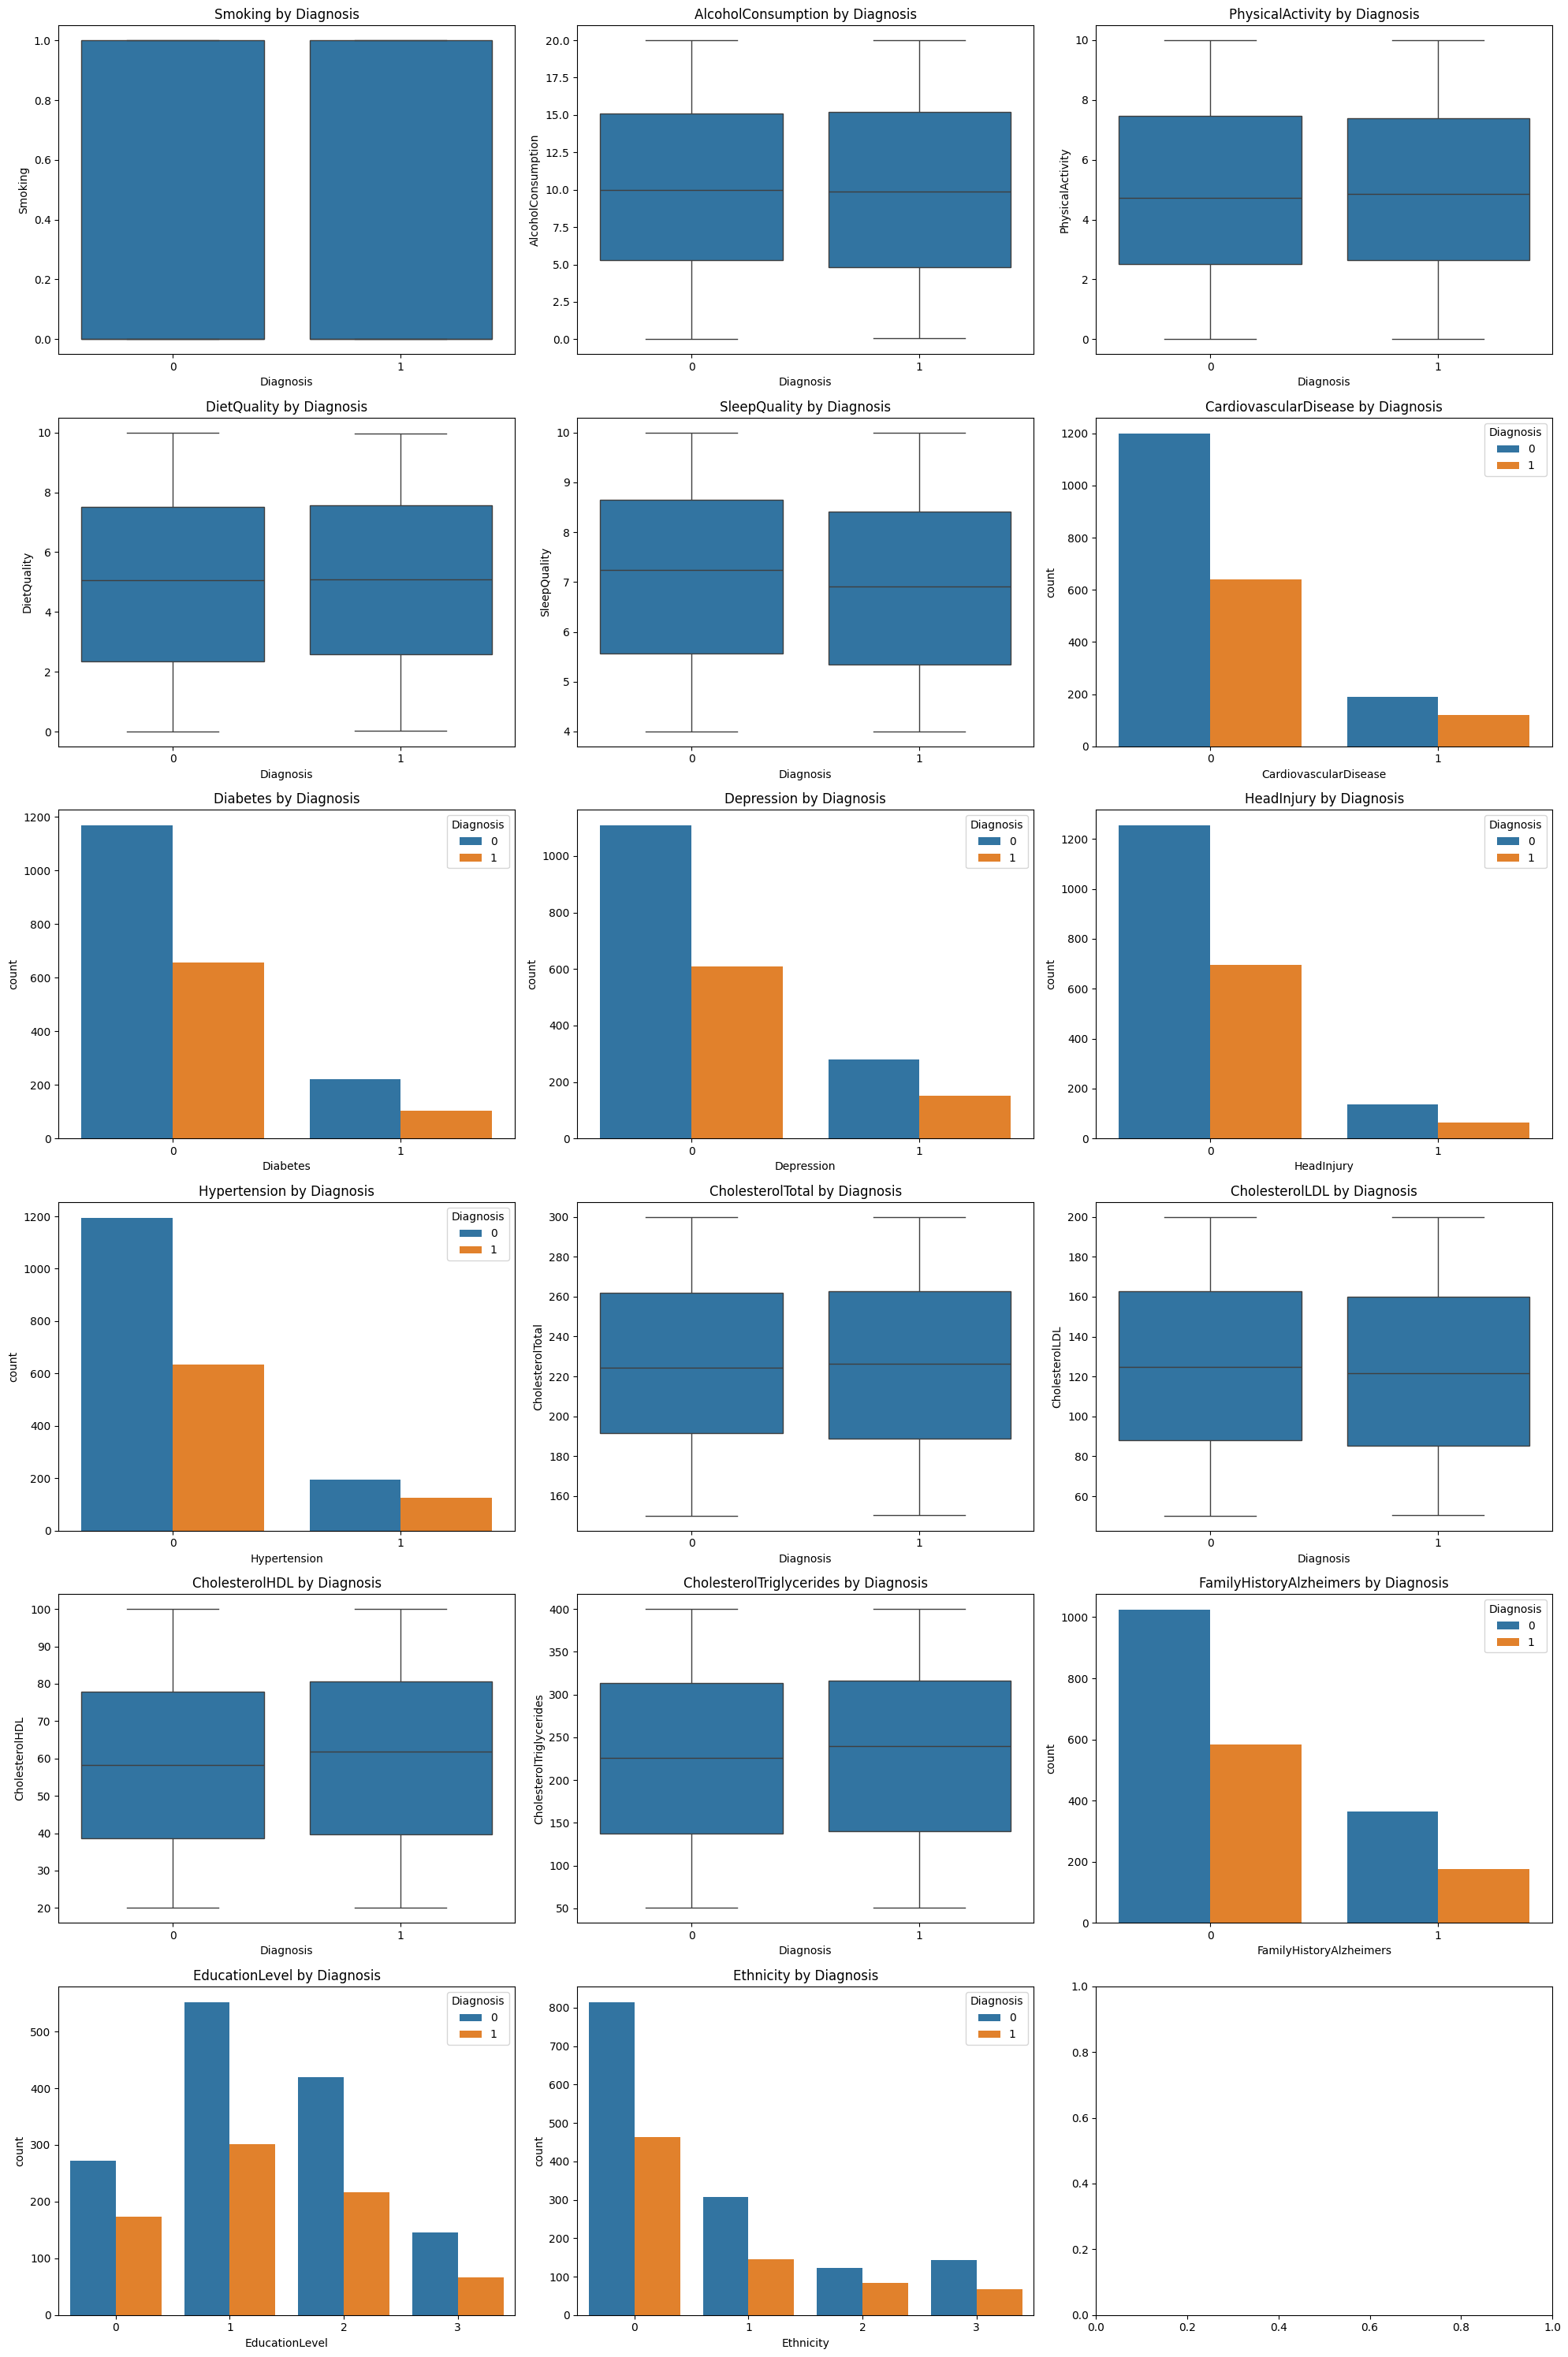

In [14]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
fig.subplots_adjust(hspace=0.5)
lifestyle_factors = ['Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
health_conditions = ['CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
cholesterol_levels = ['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
other_factors = ['FamilyHistoryAlzheimers', 'EducationLevel', 'Ethnicity']
all_factors = lifestyle_factors + health_conditions + cholesterol_levels + other_factors

for idx, col in enumerate(all_factors):
    if col in cholesterol_levels or col in lifestyle_factors:
        sns.boxplot(x='Diagnosis', y=col, data=df, ax=axes[idx // 3, idx % 3])
        axes[idx // 3, idx % 3].set_title(f'{col} by Diagnosis')
    else:
        sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[idx // 3, idx % 3])
        axes[idx // 3, idx % 3].set_title(f'{col} by Diagnosis')

plt.tight_layout()
# plt.savefig("plot5.png")
plt.show()


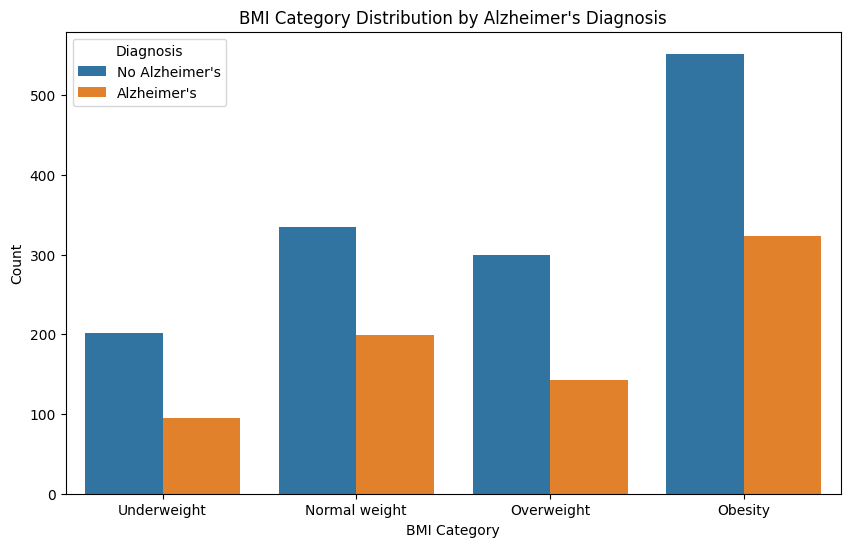

In [15]:
bmi_categories = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                        labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

df['BMI_Category'] = bmi_categories

plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Category', hue='Diagnosis', data=df)
plt.title('BMI Category Distribution by Alzheimer\'s Diagnosis')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['No Alzheimer\'s', 'Alzheimer\'s'])
# plt.savefig("plot6.png")
plt.show()


In [16]:
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [17]:
def evaluate_model(model, X_test, y_test, y_pred_prob):
    classification_rep = classification_report(y_test, model.predict(X_test))
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    return classification_rep, conf_matrix, roc_auc, accuracy

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [19]:
results = pd.DataFrame(columns=['Model', 'Stage', 'Accuracy', 'ROC AUC'])

print("Before SMOTE")
for name, model in models.items():
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    model.fit(X_train, y_train)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    classification_rep, conf_matrix, roc_auc, accuracy = evaluate_model(model, X_test, y_test, y_pred_prob_test)
    new_row = pd.DataFrame({'Model': [name], 'Stage': ['Before SMOTE'], 'Accuracy': [accuracy], 'ROC AUC': [roc_auc]})
    results = pd.concat([results, new_row], ignore_index=True)
    print(f"\n{name}")
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)
    print("ROC AUC Score:", roc_auc)
    print("Accuracy:", accuracy)

Before SMOTE

Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.79      0.70      0.74       244

    accuracy                           0.82       645
   macro avg       0.81      0.80      0.80       645
weighted avg       0.82      0.82      0.81       645

Confusion Matrix:
 [[355  46]
 [ 72 172]]
ROC AUC Score: 0.8768754343649073
Accuracy: 0.8170542635658915

SVM
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       401
           1       0.79      0.66      0.72       244

    accuracy                           0.80       645
   macro avg       0.80      0.78      0.78       645
weighted avg       0.80      0.80      0.80       645

Confusion Matrix:
 [[358  43]
 [ 83 161]]
ROC AUC Score: 0.8741874821143861
Accuracy: 0.8046511627906977

Random Forest
Classification Report:
           

In [20]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test_smote)

print("\nAfter SMOTE")
for name, model in models.items():
    y_pred_prob = cross_val_predict(model, X_train_smote_scaled, y_train_smote, cv=5, method='predict_proba')[:, 1]
    model.fit(X_train_smote_scaled, y_train_smote)
    y_pred_prob_smote = model.predict_proba(X_test_smote_scaled)[:, 1]
    classification_rep, conf_matrix, roc_auc, accuracy = evaluate_model(model, X_test_smote_scaled, y_test_smote, y_pred_prob_smote)
    new_row = pd.DataFrame({'Model': [name], 'Stage': ['After SMOTE'], 'Accuracy': [accuracy], 'ROC AUC': [roc_auc]})
    results = pd.concat([results, new_row], ignore_index=True)
    print(f"\n{name}")
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)
    print("ROC AUC Score:", roc_auc)
    print("Accuracy:", accuracy)


After SMOTE

Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       419
           1       0.83      0.84      0.83       415

    accuracy                           0.83       834
   macro avg       0.83      0.83      0.83       834
weighted avg       0.83      0.83      0.83       834

Confusion Matrix:
 [[347  72]
 [ 66 349]]
ROC AUC Score: 0.9138683612732553
Accuracy: 0.8345323741007195

SVM
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       419
           1       0.86      0.86      0.86       415

    accuracy                           0.86       834
   macro avg       0.86      0.86      0.86       834
weighted avg       0.86      0.86      0.86       834

Confusion Matrix:
 [[363  56]
 [ 58 357]]
ROC AUC Score: 0.9314949535612618
Accuracy: 0.8633093525179856

Random Forest
Classification Report:
           

In [21]:
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }
}

In [22]:
print("\nAfter Hyperparameter Tuning (Original Data)")
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_prob_tuned = best_model.predict_proba(X_test)[:, 1]
    classification_rep, conf_matrix, roc_auc, accuracy = evaluate_model(best_model, X_test, y_test, y_pred_prob_tuned)
    new_row = pd.DataFrame({'Model': [name], 'Stage': ['After Tuning (Original)'], 'Accuracy': [accuracy], 'ROC AUC': [roc_auc]})
    results = pd.concat([results, new_row], ignore_index=True)
    print(f"\n{name} (Tuned - Original Data)")
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)
    print("ROC AUC Score:", roc_auc)
    print("Accuracy:", accuracy)


After Hyperparameter Tuning (Original Data)

Logistic Regression (Tuned - Original Data)
Best Parameters: {'C': 0.1}
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.79      0.70      0.74       244

    accuracy                           0.82       645
   macro avg       0.81      0.79      0.80       645
weighted avg       0.82      0.82      0.81       645

Confusion Matrix:
 [[357  44]
 [ 74 170]]
ROC AUC Score: 0.877335350149217
Accuracy: 0.8170542635658915

SVM (Tuned - Original Data)
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       401
           1       0.79      0.66      0.72       244

    accuracy                           0.80       645
   macro avg       0.80      0.78      0.78       645
weighted avg       0.80      0.80      0.80       645

Conf

In [23]:
print("\nAfter Hyperparameter Tuning (SMOTE Data)")
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train_smote_scaled, y_train_smote)
    best_model = grid_search.best_estimator_
    y_pred_prob_tuned = best_model.predict_proba(X_test_smote_scaled)[:, 1]
    classification_rep, conf_matrix, roc_auc, accuracy = evaluate_model(best_model, X_test_smote_scaled, y_test_smote, y_pred_prob_tuned)
    new_row = pd.DataFrame({'Model': [name], 'Stage': ['After Tuning (SMOTE)'], 'Accuracy': [accuracy], 'ROC AUC': [roc_auc]})
    results = pd.concat([results, new_row], ignore_index=True)
    print(f"\n{name} (Tuned - SMOTE Data)")
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)
    print("ROC AUC Score:", roc_auc)
    print("Accuracy:", accuracy)


After Hyperparameter Tuning (SMOTE Data)

Logistic Regression (Tuned - SMOTE Data)
Best Parameters: {'C': 1}
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       419
           1       0.83      0.84      0.83       415

    accuracy                           0.83       834
   macro avg       0.83      0.83      0.83       834
weighted avg       0.83      0.83      0.83       834

Confusion Matrix:
 [[347  72]
 [ 66 349]]
ROC AUC Score: 0.9138683612732553
Accuracy: 0.8345323741007195

SVM (Tuned - SMOTE Data)
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       419
           1       0.86      0.86      0.86       415

    accuracy                           0.86       834
   macro avg       0.86      0.86      0.86       834
weighted avg       0.86      0.86      0.86       834

Confusion Matr

In [24]:
print(results)

                  Model                    Stage  Accuracy   ROC AUC
0   Logistic Regression             Before SMOTE  0.817054  0.876875
1                   SVM             Before SMOTE  0.804651  0.874187
2         Random Forest             Before SMOTE  0.893023  0.941754
3   Logistic Regression              After SMOTE  0.834532  0.913868
4                   SVM              After SMOTE  0.863309  0.931495
5         Random Forest              After SMOTE  0.900480  0.945806
6   Logistic Regression  After Tuning (Original)  0.817054  0.877335
7                   SVM  After Tuning (Original)  0.804651  0.874157
8         Random Forest  After Tuning (Original)  0.903876  0.942930
9   Logistic Regression     After Tuning (SMOTE)  0.834532  0.913868
10                  SVM     After Tuning (SMOTE)  0.863309  0.931495
11        Random Forest     After Tuning (SMOTE)  0.904077  0.946614


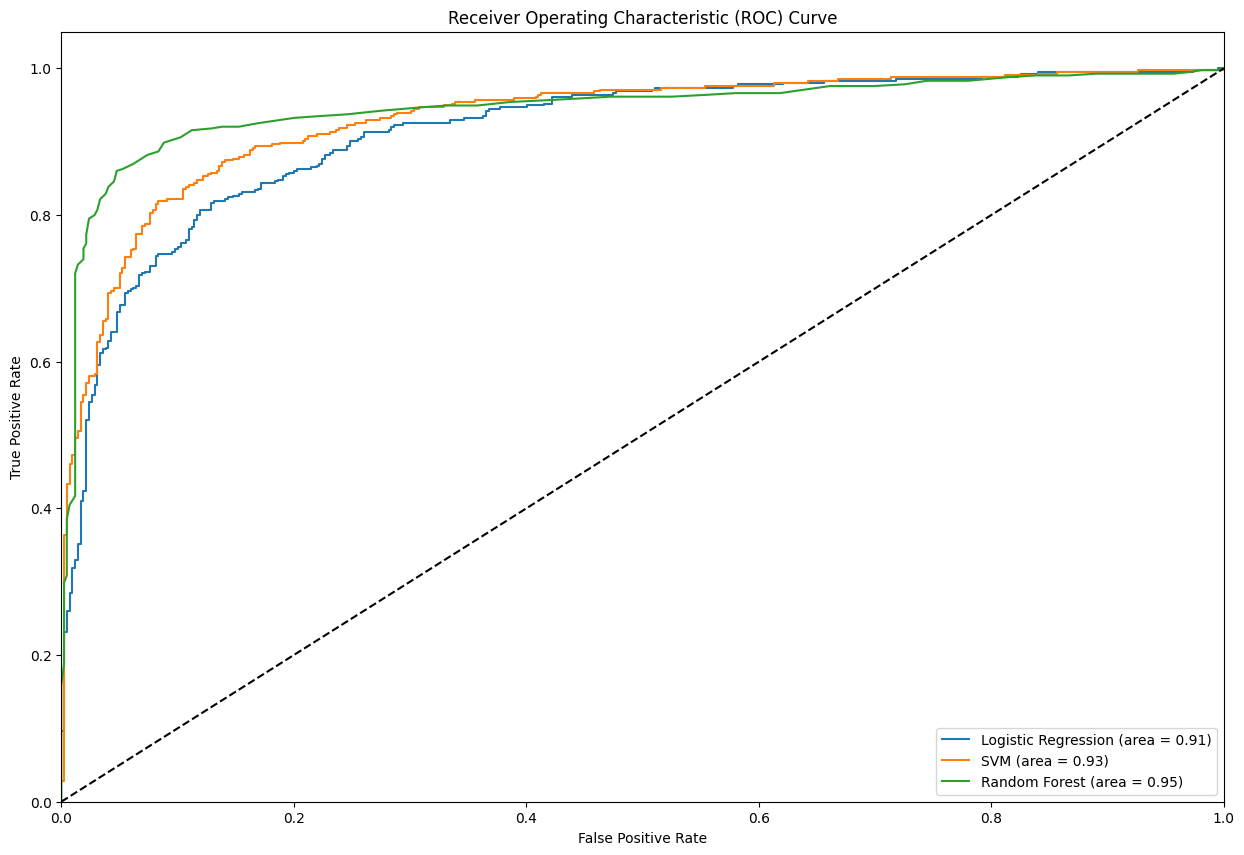

In [25]:
plt.figure(figsize=(15, 10))
for name, model in models.items():
    model.fit(X_train_smote_scaled, y_train_smote)
    y_pred_prob = model.predict_proba(X_test_smote_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_smote, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# plt.savefig("plot7.png")
plt.show()
